In [1]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler

In [2]:
features, true_labels = make_blobs(
 n_samples=200)

features, true_labels

(array([[ -9.24080482,  -9.68335322],
        [ -3.69588553,  -9.65149888],
        [ -3.63715229,  -9.33397928],
        [ -3.04135137,  -9.48699324],
        [ -8.59297339,  -3.91140465],
        [ -7.66909082,  -2.65755623],
        [ -3.73753814,  -7.5627497 ],
        [ -7.69773768,  -1.27294543],
        [ -9.41880493,  -2.28616232],
        [ -6.42143358,  -5.97748029],
        [ -7.09327969,  -9.05328615],
        [ -1.84654622, -10.67907188],
        [ -3.92335809, -10.01881493],
        [ -9.63664522,  -3.95687362],
        [ -5.45563055,  -8.44314392],
        [ -5.90581739,  -8.60669723],
        [ -7.58101265,  -8.08127658],
        [ -4.41304976,  -9.91917025],
        [ -3.84880387, -10.15724312],
        [ -2.70833336, -11.16288247],
        [ -2.54579527,  -9.55227391],
        [ -6.52004113,  -9.16062229],
        [ -8.71936737,  -1.70525757],
        [ -6.37155307,  -7.55983637],
        [ -8.04738894,  -2.53306619],
        [ -2.15749286, -10.33951672],
        [ -7

In [3]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [4]:
kmeans = KMeans(
init="random",
n_clusters=3,
n_init=10,
max_iter=300,
random_state=42 )

In [36]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, random_state=42)

In [37]:
kmeans.cluster_centers_

array([[ 0.9544802 , -1.34214423],
       [ 0.39843351,  0.9252005 ],
       [-1.3734124 ,  0.42326105]])

In [38]:
kmeans.n_iter_

2

In [39]:
labels= kmeans.labels_
labels

array([0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 0, 1, 1, 2, 1, 2, 0, 0, 1, 2, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 0, 1, 0, 0, 0, 2, 0, 2, 2, 1, 0, 1,
       1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 2, 0, 1, 1, 1, 2, 0, 2, 1, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1, 2, 1,
       1, 0, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 0, 0, 2, 0, 0, 0, 1, 2, 2, 0,
       0, 2, 2, 1, 1, 1, 0, 1, 2, 0, 0, 2, 2, 1, 2, 0, 0, 2, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 2, 2, 1, 2, 2, 0, 0, 0, 1, 2, 1, 2, 0, 1, 1, 0, 2,
       2, 1, 2, 2, 0, 2, 0, 1, 1, 2, 1, 1, 1, 1, 0, 0, 1, 2, 2, 2, 1, 1,
       2, 2, 0, 1, 2, 2, 2, 1, 2, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 2, 0, 2,
       0, 2])

In [40]:
print(davies_bouldin_score(scaled_features, labels))

0.23725813627946443


In [41]:
print(silhouette_score(scaled_features, labels))

0.8333869570059801


In [42]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"max_iter": 300,
"random_state": 42 }

In [43]:
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

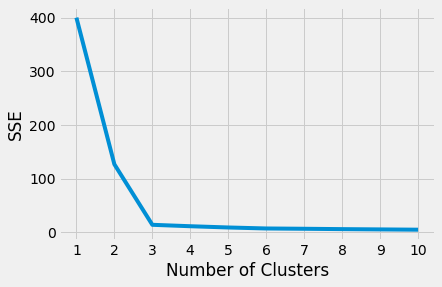

In [44]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [45]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")

kl.elbow


3

In [46]:
 # A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

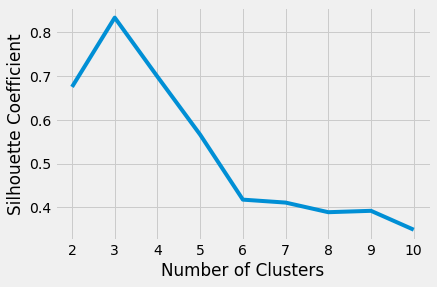

In [47]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [48]:
 # A list holds the silhouette coefficients for each k
davies_bouldin_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = davies_bouldin_score(scaled_features, kmeans.labels_)
    davies_bouldin_coefficients.append(score)

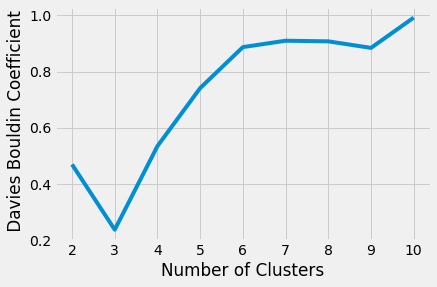

In [49]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), davies_bouldin_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel(" Davies Bouldin Coefficient")
plt.show()